In [74]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [75]:
train = pd.read_csv('titanic_train.csv')

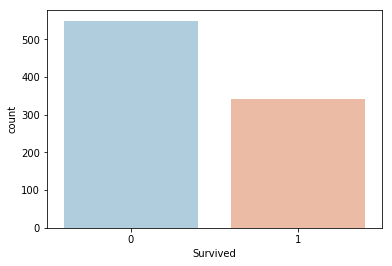

In [76]:
sns.countplot(x='Survived',data=train,palette='RdBu_r')

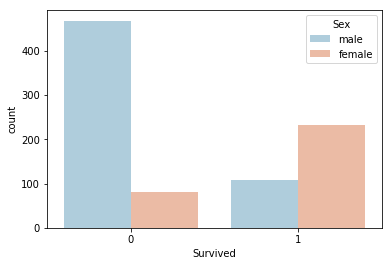

In [77]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

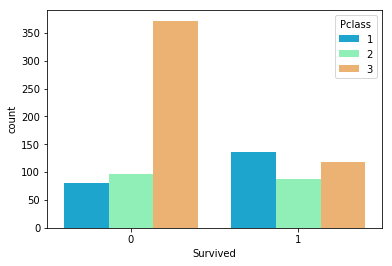

In [78]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

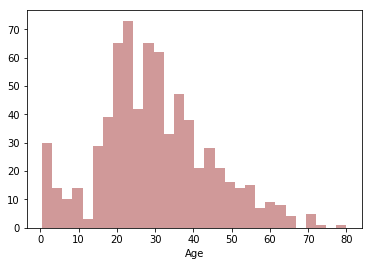

In [79]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

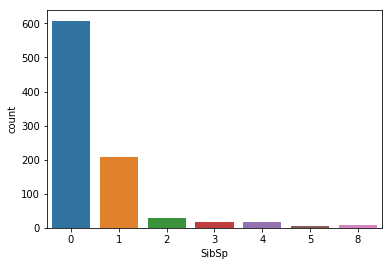

In [80]:
sns.countplot(x='SibSp',data=train)

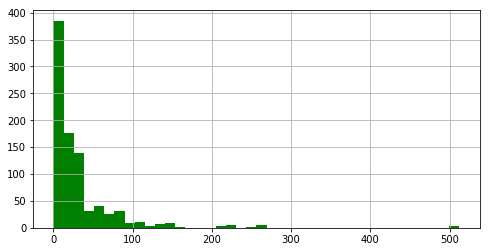

In [81]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

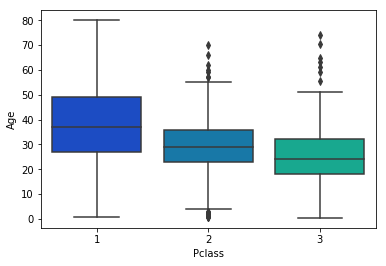

In [82]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

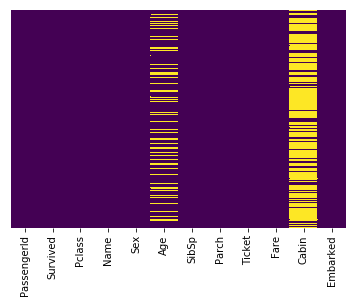

In [83]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [84]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return train.groupby('Pclass').mean()['Age'].iloc[0]

        elif Pclass == 2:
            return train.groupby('Pclass').mean()['Age'].iloc[1]

        else:
            return train.groupby('Pclass').mean()['Age'].iloc[2]

    else:
        return Age

    
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [85]:
train.drop('Cabin', axis=1, inplace=True)

In [86]:
train.dropna(inplace=True)

In [87]:
X = train.loc[:, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train.loc[:, 'Survived']

In [88]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.032411,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.055278,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.400919,0.081656,0.016824,-0.548193
Age,0.032411,-0.055278,-0.400919,1.000000,-0.242737,-0.174818,0.118050
SibSp,-0.057686,-0.034040,0.081656,-0.242737,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.174818,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.118050,0.160887,0.217532,1.000000


In [89]:
# Encoding categorical data
sex = pd.get_dummies(X['Sex'], prefix = 'Sex')
sex.drop('Sex_male', inplace = True, axis=1)

embark = pd.get_dummies(X['Embarked'], prefix = 'Embarked', drop_first=True)

passenger_class = pd.get_dummies(X['Pclass'], prefix = 'Pclass')
passenger_class.drop('Pclass_3', inplace = True, axis=1)

X.drop(['Sex','Embarked','Pclass'],axis=1,inplace=True)
X = pd.concat([X,sex,embark, passenger_class],axis=1)

Text(0.5, 1.0, 'Outlier Box Plot')

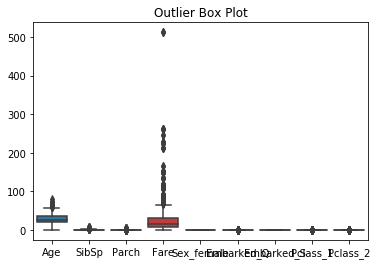

In [90]:
#Outliners
sns.boxplot(data= X).set_title("Outlier Box Plot")

In [91]:
linearity_check_df = pd.concat([pd.DataFrame(X),y],axis=1)

Text(0.5, 1.0, 'Log Odds Linear Plot')

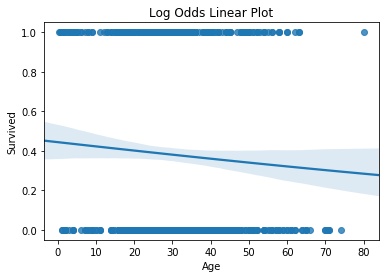

In [92]:
sns.regplot(x= 'Age', y= 'Survived', data= linearity_check_df, logistic= True).set_title("Log Odds Linear Plot")

Text(0.5, 1.0, 'Log Odds Linear Plot')

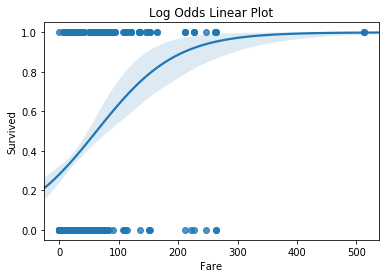

In [93]:
sns.regplot(x= 'Fare', y= 'Survived', data= linearity_check_df, logistic= True).set_title("Log Odds Linear Plot")

Text(0.5, 1.0, 'Log Odds Linear Plot')

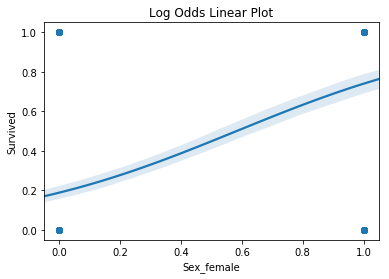

In [94]:
sns.regplot(x= 'Sex_female', y= 'Survived', data= linearity_check_df, logistic= True).set_title("Log Odds Linear Plot")

In [95]:
import statsmodels.api as sm

In [96]:
X_set = X[['Age', 'SibSp', 'Sex_female', 'Pclass_1', 'Pclass_2']]
X_set = sm.add_constant(X_set)
logit_model=sm.Logit(y,X_set)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.442156
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.335     
Dependent Variable: Survived         AIC:              798.1537  
Date:               2019-02-19 13:17 BIC:              826.8943  
No. Observations:   889              Log-Likelihood:   -393.08   
Df Model:           5                LL-Null:          -591.41   
Df Residuals:       883              LLR p-value:      1.5532e-83
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -0.9900    0.2577  -3.8412  0.0001  -1.4952  -0.4849
Age           -0.0445    0.0082  -5.4351  0.0000  -0.0605  -0.

C:\Users\manuj\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [97]:
# GETTING THE ODDS RATIOS, Z-VALUE, AND 95% CI
model_odds = pd.DataFrame(np.exp(result.params), columns= ['Odds Ratio'])
model_odds['z-value']= result.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(result.conf_int())
model_odds

,Odds Ratio,z-value,2.5%,97.5%
const,0.371560,1.224306e-04,0.224201,0.615772
Age,0.956481,5.475321e-08,0.941256,0.971951
SibSp,0.688691,3.744792e-04,0.560770,0.845794
Sex_female,15.400884,1.490541e-44,10.503403,22.581941
Pclass_1,12.407821,1.299255e-22,7.492673,20.547277
Pclass_2,3.423896,7.489074e-08,2.186535,5.361481


In [98]:
# GETTING THE ODDS RATIOS, Z-VALUE, AND 95% CI
model_odds_percentage = pd.DataFrame((np.exp(result.params)-1)*100, columns= ['Odds Percentage'])
model_odds_percentage

,Odds Percentage
const,-62.844049
Age,-4.351921
SibSp,-31.130862
Sex_female,1440.088408
Pclass_1,1140.782098
Pclass_2,242.389640


$ logit(p) = log(\frac{p}{1-p}) = \beta_0 + \beta_1 \times x_1 + ... + \beta_k \times x_k $

In terms of probabilities, the equation above is translated into

$ p = \frac{e^(\beta_0 + \beta_1 \times x_1 + ... + \beta_k \times x_k)}{1+e^(\beta_0 + \beta_1 \times x_1 + ... + \beta_k \times x_k)}  $

In [99]:
X_set = X[[]]
X_set = sm.add_constant(X_set)
logit_model=sm.Logit(y,X_set)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.665252
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.000    
Dependent Variable: Survived         AIC:              1184.8178
Date:               2019-02-19 13:17 BIC:              1189.6079
No. Observations:   889              Log-Likelihood:   -591.41  
Df Model:           0                LL-Null:          -591.41  
Df Residuals:       888              LLR p-value:      nan      
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     4.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
const    -0.4792     0.0690   -6.9430   0.0000   -0.6144   -0.3439



This means $log(\frac{p}{1-p})$ = -0.4792. What is p here? It turns out that p is the overall probability of
survival (survival = 1). Let’s take a look at the frequency table for survival.

In [115]:
crosstab = pd.crosstab(train['Survived'], train['Sex'], rownames=['Survived'], colnames=['Sex'], margins=True)

crosstab

Sex,female,male,All
Survived,,,
0,81,468,549
1,231,109,340
All,312,577,889


In [117]:
p = 340/889
p

0.38245219347581555

In [119]:
odds = p/(1-p)
odds

0.6193078324225867

In [121]:
log_odds = np.log(odds)
log_odds

-0.4791528238993233

This is the same as the Coef. above in the log table

## Logistic regression with a single dichotomous predictor variables

Now let’s go one step further by adding a binary predictor variable, female, to the model. Writing it in an equation, the model describes the following linear relationship.

$ logit(p) = \beta_0 + \beta_1 \times female $

In [122]:
X_set = X[['Sex_female']]
X_set = sm.add_constant(X_set)
logit_model=sm.Logit(y,X_set)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.515526
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.225     
Dependent Variable: Survived         AIC:              920.6061  
Date:               2019-02-19 13:33 BIC:              930.1863  
No. Observations:   889              Log-Likelihood:   -458.30   
Df Model:           1                LL-Null:          -591.41   
Df Residuals:       887              LLR p-value:      7.5957e-60
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
const        -1.4571    0.1064  -13.7007  0.0000  -1.6656  -1.2487
Sex_female    2.5051    0.1673   14.9746  0.0000   2.1772   2.

C:\Users\manuj\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Note const has changed from -0.4792 to -1.4571

In [123]:
crosstab

Sex,female,male,All
Survived,,,
0,81,468,549
1,231,109,340
All,312,577,889


In our dataset, what are the odds of a male surviving and what are the odds of a
female surviving? 

We can manually calculate these odds from the table:

In [139]:
male_odds_surviving = 109/468
male_odds_surviving

0.2329059829059829

In [140]:
female_odds_surviving = 231/81
female_odds_surviving

2.8518518518518516

In [141]:
odds_ratio_female_to_male = female_odds_surviving/male_odds_surviving
odds_ratio_female_to_male

12.244648318042811

Gender: Female are 12.245 times more likely to survive than the men.

In [143]:
# the odds for female are about 1124% higher than the odds for males.
(odds_ratio_female_to_male - 1) * 100

1124.4648318042812

Now we can relate the odds for males and females and the output from the logistic regression.

The intercept of -1.4571 is the log odds for males since male is the reference group (female = 0).

Using the odds we calculated above for males, we can confirm this: 

In [144]:
np.log(male_odds_surviving)

-1.457120413688503

The coefficient for female is the log of odds ratio between the female group and male group:

In [145]:
np.log(odds_ratio_female_to_male)

2.5050889695378578

So we can get the odds ratio by exponentiating the coefficient for female.

In [146]:
np.exp(np.log(odds_ratio_female_to_male))

12.244648318042813

## Same Result using above code

In [147]:
X_set = X[['Sex_female']]
X_set = sm.add_constant(X_set)
logit_model=sm.Logit(y,X_set)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.515526
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.225     
Dependent Variable: Survived         AIC:              920.6061  
Date:               2019-02-19 14:01 BIC:              930.1863  
No. Observations:   889              Log-Likelihood:   -458.30   
Df Model:           1                LL-Null:          -591.41   
Df Residuals:       887              LLR p-value:      7.5957e-60
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
const        -1.4571    0.1064  -13.7007  0.0000  -1.6656  -1.2487
Sex_female    2.5051    0.1673   14.9746  0.0000   2.1772   2.

In [148]:
# GETTING THE ODDS RATIOS, Z-VALUE, AND 95% CI
model_odds = pd.DataFrame(np.exp(result.params), columns= ['Odds Ratio'])
model_odds['z-value']= result.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(result.conf_int())
model_odds

,Odds Ratio,z-value,2.5%,97.5%
const,0.232906,1.005085e-42,0.189083,0.286886
Sex_female,12.244648,1.076430e-50,8.821640,16.995867


In [149]:
# GETTING THE ODDS RATIOS, Z-VALUE, AND 95% CI
model_odds_percentage = pd.DataFrame((np.exp(result.params)-1)*100, columns= ['Odds Percentage'])
model_odds_percentage

,Odds Percentage
const,-76.709402
Sex_female,1124.464832


# Logistic regression with a single continuous predictor variable

Another simple example is a model with a single continuous predictor variable such as the model below. It describes the relationship between passenger's age and the log odds of surviving.

$ logit(p) = \beta_0 + \beta_1 \times age $

In [150]:
X_set = X[['Age']]
X_set = sm.add_constant(X_set)
logit_model=sm.Logit(y,X_set)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.663714
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.002    
Dependent Variable: Survived         AIC:              1184.0837
Date:               2019-02-19 14:05 BIC:              1193.6639
No. Observations:   889              Log-Likelihood:   -590.04  
Df Model:           1                LL-Null:          -591.41  
Df Residuals:       887              LLR p-value:      0.098230 
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     4.0000                                      
------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
------------------------------------------------------------------
const     -0.2254     0.1681   -1.3412   0.1799   -0.5549   0.1040
Age       -0.0087     0.0053   -1.6451   0.1000   -0.0191   0.0017



In this case, the estimated coefficient for the intercept is the log odds of a passenger with an age of zero surviving.

In other words, the odds of surviving when the age is zero is

In [151]:
np.exp(-0.2254)

0.7981968761446542

These odds are low (less then one is not in your favour), but if we look at the distribution of the age, we will see that no one in the sample has an age of zero.

So the intercept in this model corresponds to the log odds of surviving when age is at the hypothetical value of zero.

How do we interpret the coefficient for math? The coefficient and intercept estimates give us the following equation:

$ logit(p) = log(\frac{p}{1-p}) = -0.2254 + (-0.0087) \times age $

Let’s fix age at some value. We will use 54. Then the conditional logit of surviving when the age is held at 54 is

In [153]:
-0.2254 + (-0.0087) * 54

-0.6952

We can examine the effect of a one-unit increase in Age.

In [154]:
-0.2254 + (-0.0087) * 55

-0.7039

Taking the difference of the two equations

In [162]:
difference = (-0.2254 + (-0.0087) * 55) - (-0.2254 + (-0.0087) * 54)
difference # Note this is same as the cooficient

-0.00869999999999993

We can say now that the coefficient for age is the difference in the log odds. In other words, for a one-unit increase in age, the expected change in log odds is -0.0087

Can we translate this change in log odds to the change in odds?

In [163]:
exp_difference = np.exp(difference)
exp_difference

0.9913377354877927

In [164]:
(exp_difference - 1) * 100

-0.8662264512207307

So we can say for a one-unit increase in age, we expect to see about 0.87% decrease in the odds of Survival.

This 0.87% of decrease does not depend on the value that age is held at.

## Same Result using above code

In [165]:
X_set = X[['Age']]
X_set = sm.add_constant(X_set)
logit_model=sm.Logit(y,X_set)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.663714
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.002    
Dependent Variable: Survived         AIC:              1184.0837
Date:               2019-02-19 14:25 BIC:              1193.6639
No. Observations:   889              Log-Likelihood:   -590.04  
Df Model:           1                LL-Null:          -591.41  
Df Residuals:       887              LLR p-value:      0.098230 
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     4.0000                                      
------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
------------------------------------------------------------------
const     -0.2254     0.1681   -1.3412   0.1799   -0.5549   0.1040
Age       -0.0087     0.0053   -1.6451   0.1000   -0.0191   0.0017



In [166]:
# GETTING THE ODDS RATIOS, Z-VALUE, AND 95% CI
model_odds = pd.DataFrame(np.exp(result.params), columns= ['Odds Ratio'])
model_odds['z-value']= result.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(result.conf_int())
model_odds

,Odds Ratio,z-value,2.5%,97.5%
const,0.798160,0.179860,0.574126,1.109615
Age,0.991308,0.099955,0.981052,1.001672


In [167]:
# GETTING THE ODDS RATIOS, Z-VALUE, AND 95% CI
model_odds_percentage = pd.DataFrame((np.exp(result.params)-1)*100, columns= ['Odds Percentage'])
model_odds_percentage

,Odds Percentage
const,-20.183999
Age,-0.869153


# Logistic regression with multiple predictor variables and no interaction terms

In general, we can have multiple predictor variables in a logistic regression model.

$ logit(p) = log(\frac{p}{1-p}) = \beta_0 + \beta_1 \times x_1 + ... + \beta_k \times x_k $

Applying such a model to our example dataset, each estimated coefficient is the expected change in the log odds of surviving for a unit increase in the corresponding predictor variable holding the other predictor variables constant at certain value. 

Each exponentiated coefficient is the ratio of two odds, or the change in odds in the multiplicative scale for a unit increase in the corresponding predictor variable holding other variables at certain value. Here is an example.

In [174]:
X_set = X[['Age', 'SibSp', 'Sex_female', 'Pclass_1', 'Pclass_2']]
X_set = sm.add_constant(X_set)
logit_model=sm.Logit(y,X_set)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.442156
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.335     
Dependent Variable: Survived         AIC:              798.1537  
Date:               2019-02-19 14:33 BIC:              826.8943  
No. Observations:   889              Log-Likelihood:   -393.08   
Df Model:           5                LL-Null:          -591.41   
Df Residuals:       883              LLR p-value:      1.5532e-83
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -0.9900    0.2577  -3.8412  0.0001  -1.4952  -0.4849
Age           -0.0445    0.0082  -5.4351  0.0000  -0.0605  -0.

$ logit(p) = log(\frac{p}{1-p}) = -0.9900 - 0.0445 \times Age - 0.3730 \times SibSp + 2.7344 \times Sex_{female} + 2.5183 \times Pclass_1 + 1.2308 \times Pclass_2 $

In [175]:
# GETTING THE ODDS RATIOS, Z-VALUE, AND 95% CI
model_odds = pd.DataFrame(np.exp(result.params), columns= ['Odds Ratio'])
model_odds['z-value']= result.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(result.conf_int())
model_odds

,Odds Ratio,z-value,2.5%,97.5%
const,0.371560,1.224306e-04,0.224201,0.615772
Age,0.956481,5.475321e-08,0.941256,0.971951
SibSp,0.688691,3.744792e-04,0.560770,0.845794
Sex_female,15.400884,1.490541e-44,10.503403,22.581941
Pclass_1,12.407821,1.299255e-22,7.492673,20.547277
Pclass_2,3.423896,7.489074e-08,2.186535,5.361481


In [176]:
# GETTING THE ODDS RATIOS, Z-VALUE, AND 95% CI
model_odds_percentage = pd.DataFrame((np.exp(result.params)-1)*100, columns= ['Odds Percentage'])
model_odds_percentage

,Odds Percentage
const,-62.844049
Age,-4.351921
SibSp,-31.130862
Sex_female,1440.088408
Pclass_1,1140.782098
Pclass_2,242.389640


This fitted model says that, holding Age, SibSip, Pclass_1 and Pclass_2 at a fixed value, the odds of surviving for females (female = 1) over the odds of surviving for males (female = 0) is

In [179]:
np.exp(2.7344)

15.400500363066913

In terms of percent change, we can say that the odds for females are 1440% higher than the odds for males.

In [181]:
(np.exp(2.7344)-1)*100

1440.0500363066913

The coefficient for Age says that, holding other cariables at a fixed value, we will see 4.35% decrease in the odds of survival for a one-unit increase in Age since

In [184]:
np.exp(-0.0445)

0.9564756000936208

In [185]:
(np.exp(-0.0445)-1)*100

-4.352439990637924

We need to intrepet the whole model, not just the individual small models